In [1]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
# drop url dish_liked and phone column from the dataframe
df.drop(['url' , 'dish_liked' , 'phone'] , axis = 1 , inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  menu_item                    51717 non-null  object
 12  listed_in(type)              51717 non-null  object
 13  listed_in(city)              51

In [8]:
# duplicated
df.duplicated().sum()

43

In [9]:
# remove of these duplicate values
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [21]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [23]:
df.rename(columns={'approx_cost(for two people)':'cost' , 'listed_in(type)':'type'  , 'listed_in(city)':'city' } , inplace=True)

In [24]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [25]:
df.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [30]:
df['cost'] = df.cost.astype(str)
df['cost'] = df.cost.apply(lambda x : x.replace("," , ""))
df['cost'] = df.cost.astype(float)

In [33]:
df.dtypes

address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [41]:
# removing '/5' from the data
# convert to float

df = df.loc[df.rate != 'NEW']
df = df.loc[df.rate != '-'].reset_index(drop=True)
df.rate = df.rate.apply(lambda x : x.replace('/5' , '')).astype(float)

In [42]:
df.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
41232    3.7
41233    2.5
41234    3.6
41235    4.3
41236    3.4
Name: rate, Length: 41237, dtype: float64

In [44]:
df.corr()

,rate,votes,cost
rate,1.000000,0.435237,0.385261
votes,0.435237,1.000000,0.366544
cost,0.385261,0.366544,1.000000


<AxesSubplot:>

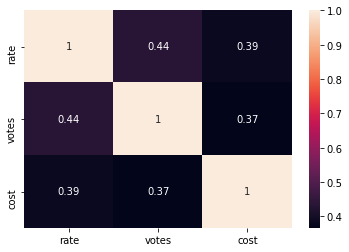

In [45]:
sns.heatmap(df.corr() , annot = True)

In [46]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-0.2, 3, 'An annotation')

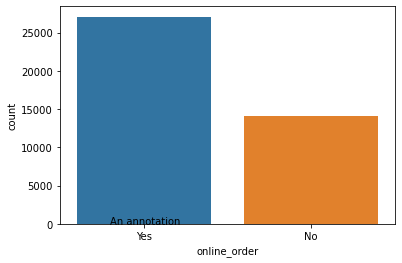

In [58]:
# data visulaisation
# How many restaurants are del online

sns.countplot(df.online_order)
plt.text(-0.2,+3, "An annotation")


In [59]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

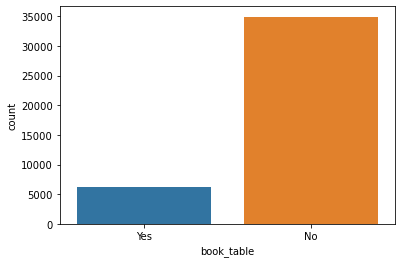

In [60]:
# number of hotels allowing table booking
sns.countplot(df.book_table)


/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


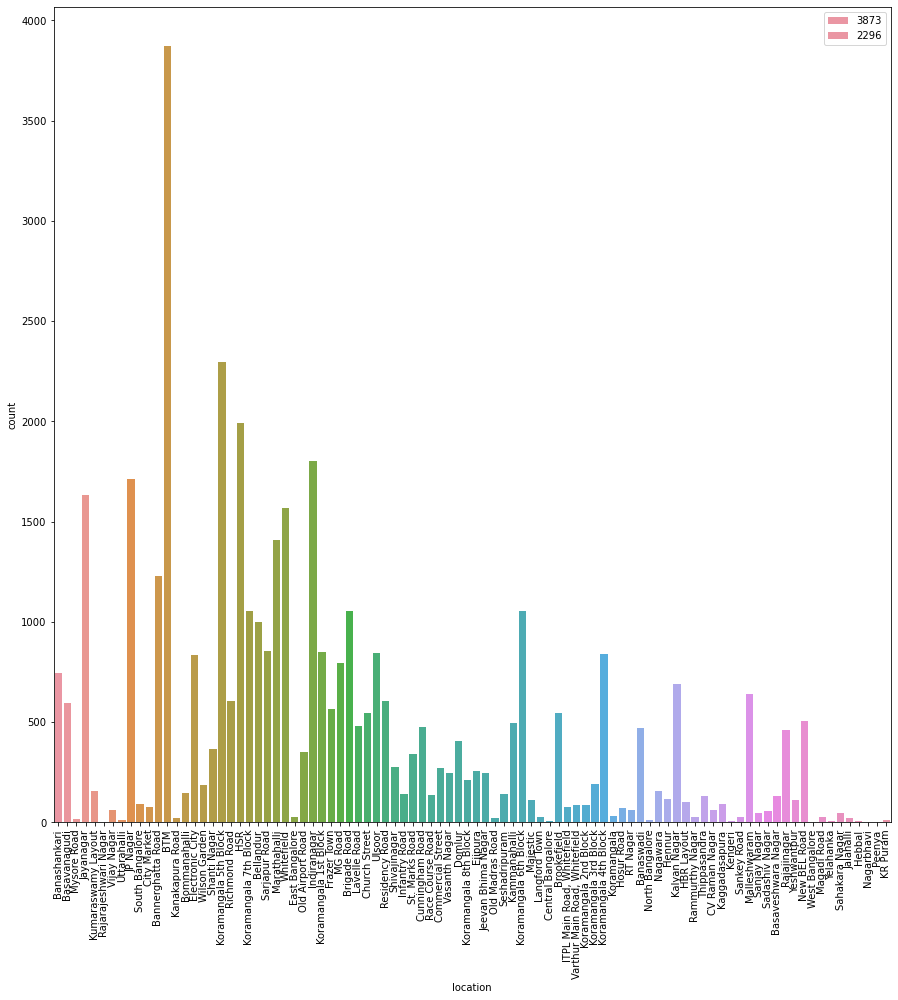

In [68]:
# how many rest ar eder in each location
sns.countplot(df.location).set_xticklabels(sns.countplot(df.location).get_xticklabels() , rotation = 90)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.legend(df.location.value_counts())

In [67]:
df.location.value_counts()

BTM                      3873
Koramangala 5th Block    2296
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: location, Length: 92, dtype: int64

/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Banashankari'),
 Text(1, 0, 'Basavanagudi'),
 Text(2, 0, 'Mysore Road'),
 Text(3, 0, 'Jayanagar'),
 Text(4, 0, 'Kumaraswamy Layout'),
 Text(5, 0, 'Rajarajeshwari Nagar'),
 Text(6, 0, 'Vijay Nagar'),
 Text(7, 0, 'Uttarahalli'),
 Text(8, 0, 'JP Nagar'),
 Text(9, 0, 'South Bangalore'),
 Text(10, 0, 'City Market'),
 Text(11, 0, 'Bannerghatta Road'),
 Text(12, 0, 'BTM'),
 Text(13, 0, 'Kanakapura Road'),
 Text(14, 0, 'Bommanahalli'),
 Text(15, 0, 'Electronic City'),
 Text(16, 0, 'Wilson Garden'),
 Text(17, 0, 'Shanti Nagar'),
 Text(18, 0, 'Koramangala 5th Block'),
 Text(19, 0, 'Richmond Road'),
 Text(20, 0, 'HSR'),
 Text(21, 0, 'Koramangala 7th Block'),
 Text(22, 0, 'Bellandur'),
 Text(23, 0, 'Sarjapur Road'),
 Text(24, 0, 'Marathahalli'),
 Text(25, 0, 'Whitefield'),
 Text(26, 0, 'East Bangalore'),
 Text(27, 0, 'Old Airport Road'),
 Text(28, 0, 'Indiranagar'),
 Text(29, 0, 'Koramangala 1st Block'),
 Text(30, 0, 'Frazer Town'),
 Text(31, 0, 'MG Road'),
 Text(32, 0, 'Brigade Road'

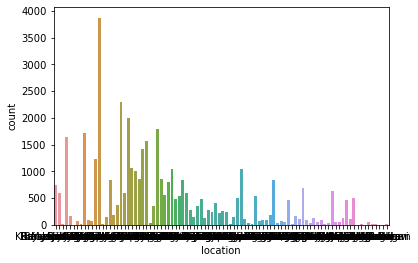

In [62]:
sns.countplot(df.location).get_xticklabels()

/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


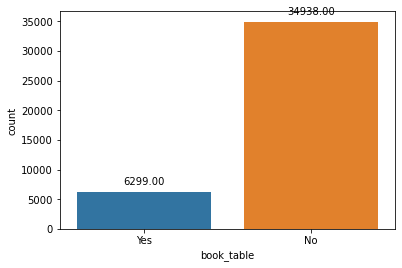

In [71]:
splot= sns.countplot('book_table',data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# count plot
# heatmap
# bar
# hist
# relplot
# scatter
# pair plot
# distplot
# displot
# regplot
# violin
# box
# swarm


In [72]:
# data collection ---> cleaning ---> data visulation --- >which algo ---> model - ml



# data collection ----> cleaning ---> which algo-----> model - dl



/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Buffet'),
 Text(1, 0, 'Cafes'),
 Text(2, 0, 'Delivery'),
 Text(3, 0, 'Desserts'),
 Text(4, 0, 'Dine-out'),
 Text(5, 0, 'Drinks & nightlife'),
 Text(6, 0, 'Pubs and bars')]

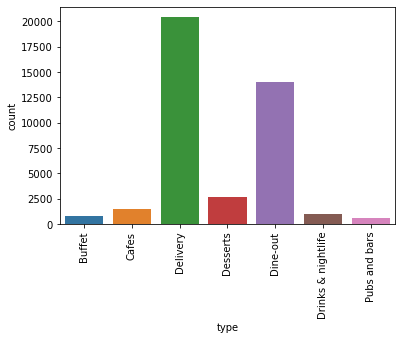

In [75]:
#types of services

sns.countplot(df.type).set_xticklabels(sns.countplot(df.type).get_xticklabels() , rotation = 90)

In [77]:
df.name.value_counts()[:20]

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Five Star Chicken    68
Kanti Sweets         68
Just Bake            67
Baskin Robbins       62
Petoo                60
Pizza Hut            60
KFC                  60
Domino's Pizza       59
McDonald's           59
Smoor                59
Subway               59
Sweet Truth          58
Polar Bear           58
Faasos               56
Beijing Bites        56
Burger King          55
Keventers            54
Name: name, dtype: int64

In [80]:
chain = df.name.value_counts()[:20]

<AxesSubplot:xlabel='name'>

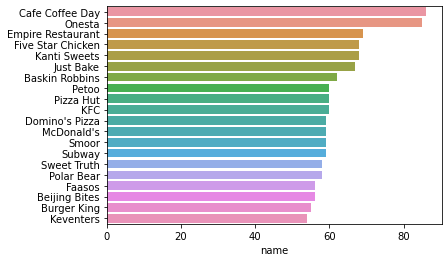

In [81]:
sns.barplot(x= chain , y =chain.index)

In [84]:
df.name.value_counts()[:20].index

Index(['Cafe Coffee Day', 'Onesta', 'Empire Restaurant', 'Five Star Chicken',
       'Kanti Sweets', 'Just Bake', 'Baskin Robbins', 'Petoo', 'Pizza Hut',
       'KFC', 'Domino's Pizza', 'McDonald's', 'Smoor', 'Subway', 'Sweet Truth',
       'Polar Bear', 'Faasos', 'Beijing Bites', 'Burger King', 'Keventers'],
      dtype='object')